In [7]:
import pandas as pd

In [8]:
diare = pd.read_csv('diare tok.csv')

In [9]:
diare.shape

(19823, 10)

# Text Preprocessing

In [10]:
import numpy as np
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

In [11]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./-]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    clean = re.sub(combined_pat, '', souped)
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
result = []
for t in diare['text']:
    result.append(tweet_cleaner(t))
diare['result'] = result

In [12]:
diare.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result
0,@obatpeninggi01,2018-01-08,06:54,Batang buah Nona mengandung Senyawa asetogeni...,950153792447594496,,,,,,batang buah nona mengandung senyawa asetogenin...
1,@Tiens_Bandung,2018-01-08,06:46,Meminum Kopi Ketika Hamil Juga Dapat Membantu...,950151640891273216,,,,,,meminum kopi ketika hamil juga dapat membantu ...
2,@nisaannisa874u,2018-01-08,06:32,Aku diare .... Tapi bleeding ....,950148275566469121,,,,,,aku diare tapi bleeding
3,@obatpeninggi08,2018-01-08,06:27,Kandungan astringents buah jambu biji merah d...,950146863851741184,,,,,,kandungan astringents buah jambu biji merah da...
4,@dietdenganteh,2018-01-08,06:16,Kandungan Astringents Buah Jambu Biji Merah D...,950144191996166144,,,,,,kandungan astringents buah jambu biji merah da...


In [13]:
clean_tweet_texts = diare.drop_duplicates(subset=['result'], keep=False)

In [15]:
clean_tweet_texts.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude,result
2,@nisaannisa874u,2018-01-08,06:32,Aku diare .... Tapi bleeding ....,950148275566469121,,,,,,aku diare tapi bleeding
8,@dyadona,2018-01-08,03:51,Pernahkah kamu diare? Gmn rasanya? — Ga recom...,950107545691197440,,,,,,pernahkah kamu diare gmn rasanya ga recommend ...
13,@PusshyMiaw,2018-01-08,02:40,Tadi beneran diare.. Yg skrg apa?,950089757496782848,,,,,,tadi beneran diare yg skrg apa
14,@naufalsyamsi,2018-01-08,02:31,Kalau telapak tangan sering keluar keringat i...,950087513498103808,,,,,,kalau telapak tangan sering keluar keringat it...
15,@ayo_hidup_sehat,2018-01-08,01:57,nih buat kamu yang para orang tua atau calon ...,950078975803514880,,,,,,nih buat kamu yang para orang tua atau calon o...


In [17]:
clean_tweet_texts.to_csv('diare pre.csv')

In [10]:
clean_string = []
for t in clean_tweet_texts['result']:
    clean_string.append(t)
clean_string = pd.Series(clean_string).str.cat(sep=' ')

In [11]:
from collections import Counter
freq = clean_string.split()
Counter(freq).most_common(300)


[('diare', 13999),
 ('dan', 2264),
 ('makan', 2039),
 ('ini', 1913),
 ('yang', 1732),
 ('di', 1723),
 ('aku', 1702),
 ('lagi', 1550),
 ('yg', 1549),
 ('ga', 1514),
 ('ya', 1488),
 ('itu', 1256),
 ('kalo', 1249),
 ('bisa', 1194),
 ('obat', 1167),
 ('sakit', 1131),
 ('aja', 1059),
 ('hari', 1036),
 ('tapi', 998),
 ('minum', 998),
 ('ada', 991),
 ('gue', 935),
 ('gak', 925),
 ('udah', 885),
 ('perut', 878),
 ('ke', 861),
 ('apa', 859),
 ('juga', 779),
 ('mau', 779),
 ('sama', 774),
 ('jadi', 733),
 ('karena', 657),
 ('dari', 645),
 ('kena', 588),
 ('terus', 580),
 ('sampe', 580),
 ('sih', 578),
 ('anak', 552),
 ('pernah', 552),
 ('atau', 548),
 ('pas', 540),
 ('kamu', 520),
 ('dia', 519),
 ('langsung', 517),
 ('saya', 501),
 ('nya', 489),
 ('buat', 461),
 ('muntah', 461),
 ('kan', 453),
 ('bikin', 453),
 ('makanan', 453),
 ('lg', 451),
 ('gitu', 451),
 ('dengan', 449),
 ('tp', 442),
 ('pedes', 438),
 ('masih', 437),
 ('jangan', 433),
 ('banget', 432),
 ('untuk', 424),
 ('kalau', 422),
 ('

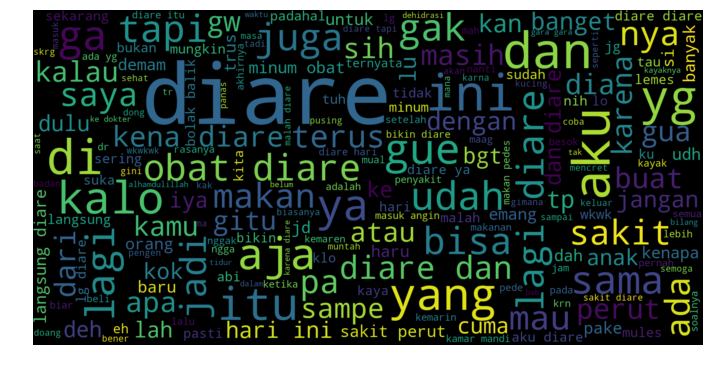

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(clean_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()